In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
# # condense into one df 
df_all = pd.read_csv('../Job_Datasets/cleaned_whole_data.csv', parse_dates=True)
df_all

,id,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year
0,41034,"""Hi all, for context, 29 year old guy from Ams...",Lazy job or Hard job?,Weak_Assumption_6889,8,1bfpxll,0.33,0,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 22:07:22,Friday,22,March,2024
1,43519,"""Looking for a new role and haven\u2019t had m...",Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21,March,2024
2,41067,"""I am a 24M, from west bengal with a bachelor'...",Is Jadavpur University good for MCA?,grvx_rdt,0,1bfg926,0.66,1,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 15:12:00,Friday,15,March,2024
3,43536,"""It's created in MS word.. I have 3.5 yoe in J...",Review my resume please,GroundbreakingZone94,7,1bh3jpg,0.60,1,https://i.redd.it/tjnti8vplxoc1.jpeg,resumes,Review my resume • I'm in Asia,3d212a9a-f5cb-11ec-acef-1adb3b338801,2024-03-17 17:43:39,Sunday,17,March,2024
4,43602,"""I live in Los Angeles and am 27 years old.\n""",Thoughts on My Experience?,AshamedJellyfish9197,1,1bgejk2,0.33,0,https://i.redd.it/ifqv15ry3roc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-16 19:53:24,Saturday,19,March,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,51100,"""I (23 M) work at a small IT company. I've wor...","Lazy coworker causes high workload, should i q...",YoungBtje,38,1bdrwq9,0.80,23,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Unknown,Unknown,2024-03-13 13:48:53,Wednesday,13,March,2024
7893,51101,"""\nI have been in the same industry for 20+ of...",Changing careers at 40. Doable? [UK],evielstar,0,1bef0eo,1.00,1,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 06:50:09,Thursday,6,March,2024
7894,51102,"""So I've been with my company for over 5 years...",Job Promotion - Will I Regret it If I Move For...,mr_chill_guy,2,1beawv5,1.00,2,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 02:55:56,Thursday,2,March,2024
7895,51103,"""I\u2019m 27 years old and have held a couple ...",I’m tired of working corporate desk job.. what...,Willoxs,200,1bdjupr,0.92,101,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-13 05:36:24,Wednesday,5,March,2024


In [3]:
df_all.dropna(inplace=True)
df_all

,id,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year
0,41034,"""Hi all, for context, 29 year old guy from Ams...",Lazy job or Hard job?,Weak_Assumption_6889,8,1bfpxll,0.33,0,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 22:07:22,Friday,22,March,2024
1,43519,"""Looking for a new role and haven\u2019t had m...",Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21,March,2024
2,41067,"""I am a 24M, from west bengal with a bachelor'...",Is Jadavpur University good for MCA?,grvx_rdt,0,1bfg926,0.66,1,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 15:12:00,Friday,15,March,2024
3,43536,"""It's created in MS word.. I have 3.5 yoe in J...",Review my resume please,GroundbreakingZone94,7,1bh3jpg,0.60,1,https://i.redd.it/tjnti8vplxoc1.jpeg,resumes,Review my resume • I'm in Asia,3d212a9a-f5cb-11ec-acef-1adb3b338801,2024-03-17 17:43:39,Sunday,17,March,2024
4,43602,"""I live in Los Angeles and am 27 years old.\n""",Thoughts on My Experience?,AshamedJellyfish9197,1,1bgejk2,0.33,0,https://i.redd.it/ifqv15ry3roc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-16 19:53:24,Saturday,19,March,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,51100,"""I (23 M) work at a small IT company. I've wor...","Lazy coworker causes high workload, should i q...",YoungBtje,38,1bdrwq9,0.80,23,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Unknown,Unknown,2024-03-13 13:48:53,Wednesday,13,March,2024
7893,51101,"""\nI have been in the same industry for 20+ of...",Changing careers at 40. Doable? [UK],evielstar,0,1bef0eo,1.00,1,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 06:50:09,Thursday,6,March,2024
7894,51102,"""So I've been with my company for over 5 years...",Job Promotion - Will I Regret it If I Move For...,mr_chill_guy,2,1beawv5,1.00,2,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 02:55:56,Thursday,2,March,2024
7895,51103,"""I\u2019m 27 years old and have held a couple ...",I’m tired of working corporate desk job.. what...,Willoxs,200,1bdjupr,0.92,101,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-13 05:36:24,Wednesday,5,March,2024


In [4]:
import re
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    # text = expand_contractions(text)

    # Removing unicode characters
    text = re.sub(r'\\u[0-9A-Fa-f]+', '', text)
    # Removing escape sequences
    text = re.sub(r'\\n', ' ', text)
    text = re.sub(r'\\', '', text)
    # Removing non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words and lemmatizing
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

df_all['text_clean'] = df_all['text'].apply(preprocess_text) # .apply(lambda x: x.encode('ascii', 'ignore'))
# df_all['text_clean'] = df_all['text'].apply(lambda x: x.encode('ascii', 'ignore'))

# def tokenize(text):
#     word_tokens = word_tokenize(text)
#     text_list = [w for w in word_tokens if not w.lower() in stop_words]
#     return ' '.join(text_list)

# df_all['text_clean'] = df_all['text'].apply(tokenize)
# texts = df_all['text_list'].tolist()
# dictionary = corpora.Dictionary(texts)
# texts

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = vec.fit_transform(df_all['text_clean'])

In [6]:
feature_names = vec.get_feature_names_out()
feature_names

array(['ability', 'able', 'absolutely', 'accept', 'accepted', 'access',
       'account', 'accounting', 'across', 'action', 'actual', 'actually',
       'add', 'additional', 'admin', 'administration', 'advance',
       'advice', 'afford', 'afraid', 'age', 'agency', 'ago', 'ai',
       'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'also',
       'although', 'always', 'amount', 'analysis', 'analyst', 'another',
       'answer', 'anxiety', 'anymore', 'anyone', 'anything', 'anyway',
       'application', 'applied', 'apply', 'applying', 'appreciate',
       'appreciated', 'approach', 'area', 'arent', 'around', 'art', 'ask',
       'asked', 'asking', 'asset', 'assignment', 'assistant', 'associate',
       'available', 'average', 'avoid', 'aware', 'away', 'bachelor',
       'back', 'background', 'bad', 'balance', 'bank', 'banking',
       'barely', 'base', 'based', 'basic', 'basically', 'become',
       'becoming', 'beginning', 'behavior', 'behind', 'believe',
       'benefit', '

In [7]:
# from sklearn.decomposition import NMF
# from gensim.models.coherencemodel import CoherenceModel

# num_top_words = 100
# scores = []
# best_avg_coherence = 0
# best_model = None
# best_W = None
# best_H = None
# random_state = 0

# for num_topics in range(2,11):
#     nmf = NMF(n_components = num_topics, 
#                   max_iter = 200, init = 'nndsvd', random_state = random_state)
#     W = nmf.fit_transform(tfidf)
#     H = nmf.components_
    
#     topics = []
#     for topic_idx, topic in enumerate(H):
#         top_features_ind = topic.argsort()[-num_top_words:][::-1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         print(f"top_features: {top_features}")
#         topics.append(top_features)
#     print(f"topics: {topics}")
        
#     coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
#     avg_c = coherence_model.get_coherence()
#     scores.append(avg_c)
    
#     if avg_c > best_avg_coherence:
#         best_avg_coherence = avg_c
#         best_model = nmf
#         best_W = W
#         best_H = H

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

import pickle

f = open("./text8_W2V.pickle", "rb")
text8_model = pickle.load(f)
f.close()

def topical_coherence(terms):
    embeddings = []
    for term in terms:
        try:
            embeddings.append(text8_model.transform(term)[0])
        except KeyError:
            continue

    if len(embeddings) == 0:
        return 0
    else:
        cos_sim = cosine_similarity(embeddings)
        np.fill_diagonal(cos_sim, 0)
        return cos_sim.mean()

In [9]:
from sklearn.decomposition import NMF

scores = []
best_n = None
best_score = 0
best_model = None

for n in range(2, 21):
    nmf = NMF(n_components=n, random_state=42, init="nndsvd")
    W = nmf.fit_transform(tfidf)
    H = nmf.components_
    
    coherences = []
    for topic_index in range(0, n):
        top_indices = np.argsort(H[topic_index, :])[::-1]
        top_terms = []
        for term_index in top_indices[0:10]:
            top_terms.append(feature_names[term_index])
        coherences.append(topical_coherence(top_terms))

    score = np.median(coherences)
    scores.append(score)
    if np.median(coherences) > best_score:
        best_score = score
        best_n = n
        best_model = nmf

print(f"result: {scores}")
print(f"best_score: {best_score}")
print(f"best_n: {best_n}")

result: [0.124383524, 0.15709409, 0.15121713, 0.13754511, 0.14015383, 0.18848084, 0.14086986, 0.18494408, 0.17870349, 0.17973247, 0.17606036, 0.17973246, 0.20805097, 0.22649583, 0.21433046, 0.22649582, 0.21657044, 0.20299716, 0.20172507]
best_score: 0.22649583220481873
best_n: 15


In [10]:
from sklearn.decomposition import NMF

n_topics = 7 # this is not best_n
X = tfidf

nmf = NMF(n_components=n_topics, random_state=0, init="nndsvd")
W = nmf.fit_transform(X) 
H = nmf.components_

top = 8
topic_top_terms = {}
topic_list = ["job_search", "education", "career_path" , "experience", "recruiting", "opportunities", "misc"]

for topic_index in range(0, n_topics):
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(feature_names[term_index])
    # print("topic ", topic_index, top_terms)

    topic_top_terms[topic_list[topic_index]] = top_terms
print(topic_top_terms)

{'job_search': ['job', 'im', 'ive', 'month', 'get', 'new', 'got', 'applying'], 'education': ['teacher', 'school', 'student', 'class', 'teaching', 'kid', 'year', 'grade'], 'career_path': ['im', 'career', 'experience', 'degree', 'year', 'finance', 'would', 'role'], 'experience': ['xb', 'feedback', 'cv', 'appreciated', 'experience', 'product', 'title', 'engineer'], 'recruiting': ['resume', 'interview', 'applying', 'help', 'please', 'feedback', 'experience', 'position'], 'opportunities': ['company', 'manager', 'week', 'role', 'new', 'team', 'year', 'work'], 'misc': ['like', 'dont', 'im', 'know', 'would', 'people', 'work', 'get']}


In [11]:
"""
n_topics = 15

topic  0 ['like', 'dont', 'know', 'want', 'feel', 'really', 'people', 'get']
topic  1 ['teacher', 'school', 'student', 'class', 'teaching', 'kid', 'grade', 'year']
topic  2 ['year', 'career', 'degree', 'experience', 'field', 'engineering', 'science', 'computer']
topic  3 ['xb', 'feedback', 'cv', 'appreciated', 'product', 'experience', 'looking', 'type']
topic  4 ['interview', 'question', 'round', 'position', 'got', 'applied', 'process', 'email']
topic  5 ['role', 'analyst', 'data', 'current', 'management', 'team', 'experience', 'manager']
topic  6 ['would', 'law', 'state', 'could', 'legal', 'someone', 'say', 'case']
topic  7 ['job', 'month', 'get', 'current', 'applying', 'new', 'market', 'pay']
topic  8 ['resume', 'help', 'applying', 'feedback', 'please', 'experience', 'looking', 'internship']
topic  9 ['day', 'week', 'work', 'hour', 'time', 'manager', 'bos', 'told']
topic  10 ['im', 'ive', 'looking', 'sure', 'advice', 'currently', 'right', 'going']
topic  11 ['sale', 'business', 'year', 'commission', 'customer', 'industry', 'sell', 'people']
topic  12 ['company', 'offer', 'position', 'year', 'salary', 'current', 'pay', 'new']
topic  13 ['finance', 'internship', 'financial', 'business', 'master', 'analyst', 'summer', 'investment']
topic  14 ['title', 'basically', 'say', 'question', 'see', 'manager', 'come', 'ask']
"""

"\nn_topics = 15\n\ntopic  0 ['like', 'dont', 'know', 'want', 'feel', 'really', 'people', 'get']\ntopic  1 ['teacher', 'school', 'student', 'class', 'teaching', 'kid', 'grade', 'year']\ntopic  2 ['year', 'career', 'degree', 'experience', 'field', 'engineering', 'science', 'computer']\ntopic  3 ['xb', 'feedback', 'cv', 'appreciated', 'product', 'experience', 'looking', 'type']\ntopic  4 ['interview', 'question', 'round', 'position', 'got', 'applied', 'process', 'email']\ntopic  5 ['role', 'analyst', 'data', 'current', 'management', 'team', 'experience', 'manager']\ntopic  6 ['would', 'law', 'state', 'could', 'legal', 'someone', 'say', 'case']\ntopic  7 ['job', 'month', 'get', 'current', 'applying', 'new', 'market', 'pay']\ntopic  8 ['resume', 'help', 'applying', 'feedback', 'please', 'experience', 'looking', 'internship']\ntopic  9 ['day', 'week', 'work', 'hour', 'time', 'manager', 'bos', 'told']\ntopic  10 ['im', 'ive', 'looking', 'sure', 'advice', 'currently', 'right', 'going']\ntopic

In [12]:
"""
n_topics = 7
TOPIC LABELS (Human Judgment)

topic  0: JOB SEARCH ['job', 'im', 'ive', 'month', 'get', 'new', 'got', 'applying']
topic  1: EDUCATION ['teacher', 'school', 'student', 'class', 'teaching', 'kid', 'year', 'grade']
topic  2: CAREER PATH ['im', 'career', 'experience', 'degree', 'year', 'finance', 'would', 'role']
topic  3: CANDIDATE EXPERIENCE ['xb', 'feedback', 'cv', 'appreciated', 'experience', 'product', 'title', 'engineer']
topic  4: RECRUITING ['resume', 'interview', 'applying', 'help', 'please', 'feedback', 'experience', 'position']
topic  5: EMPLOYMENT OPPORTUNITIES ['company', 'manager', 'week', 'role', 'new', 'team', 'year', 'work']
topic  6: MISCELLANEOUS ['like', 'dont', 'im', 'know', 'would', 'people', 'work', 'get']
"""

"\nn_topics = 7\nTOPIC LABELS (Human Judgment)\n\ntopic  0: JOB SEARCH ['job', 'im', 'ive', 'month', 'get', 'new', 'got', 'applying']\ntopic  1: EDUCATION ['teacher', 'school', 'student', 'class', 'teaching', 'kid', 'year', 'grade']\ntopic  2: CAREER PATH ['im', 'career', 'experience', 'degree', 'year', 'finance', 'would', 'role']\ntopic  3: CANDIDATE EXPERIENCE ['xb', 'feedback', 'cv', 'appreciated', 'experience', 'product', 'title', 'engineer']\ntopic  4: RECRUITING ['resume', 'interview', 'applying', 'help', 'please', 'feedback', 'experience', 'position']\ntopic  5: EMPLOYMENT OPPORTUNITIES ['company', 'manager', 'week', 'role', 'new', 'team', 'year', 'work']\ntopic  6: MISCELLANEOUS ['like', 'dont', 'im', 'know', 'would', 'people', 'work', 'get']\n"

In [13]:
feature_names = np.array(feature_names)
sorted_indices = np.array([list(row[::-1]) 
                        for row 
                        in np.argsort(np.abs(H))])
sorted_weights = np.array([list(wt[index]) 
                            for wt, index 
                            in zip(H,sorted_indices)])
sorted_terms = np.array([list(feature_names[row]) 
                            for row 
                            in sorted_indices])

topics = [np.vstack((terms.T, 
                    term_weights.T)).T 
            for terms, term_weights 
            in zip(sorted_terms, sorted_weights)]

print(topics)

[array([['job', '3.0453225252576694'],
       ['im', '0.5733264150951244'],
       ['ive', '0.424344634052372'],
       ...,
       ['given', '0.0'],
       ['science', '0.0'],
       ['ability', '0.0']], dtype='<U32'), array([['teacher', '1.3784774372206499'],
       ['school', '1.2845160755230913'],
       ['student', '1.2421363536940941'],
       ...,
       ['team', '0.0'],
       ['laid', '0.0'],
       ['firm', '0.0']], dtype='<U32'), array([['im', '1.0505647360732608'],
       ['career', '0.8467166818237827'],
       ['experience', '0.7774838725639641'],
       ...,
       ['discussion', '0.0'],
       ['district', '0.0'],
       ['entire', '0.0']], dtype='<U32'), array([['xb', '2.8643205776057186'],
       ['feedback', '0.0633994739522626'],
       ['cv', '0.04286201704740284'],
       ...,
       ['hour', '0.0'],
       ['since', '0.0'],
       ['loan', '0.0']], dtype='<U32'), array([['resume', '1.828180753551204'],
       ['interview', '1.3905071675672296'],
       ['applying

In [14]:
df_all['topic'] = ""
# for i in range(len(df_all['text_clean'])):
#     df_all['topic'][i] = topics[np.argmax(W[i])][0][0]

for i,title in enumerate(df_all['title']):
    best_score = 0
    best_topic = 'misc'
    for key,terms in topic_top_terms.items(): # range(len(n_topics)):
        score = topical_coherence(title.split(' ') + terms)
        if score > best_score:
            best_score = score
            best_topic = key

    df_all['topic'][i] = best_topic

df_all['topic']

0        education
1        education
2        education
3       recruiting
4        education
           ...    
7892              
7893              
7894              
7895              
7896              
Name: topic, Length: 7856, dtype: object

In [15]:
df_all.to_csv("topic_labels.csv", columns=["post_id", "topic"])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf_documents = tf_vectorizer.fit_transform(df_all['text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

print(tf_documents.shape)

(7856, 25994)


In [17]:
# n_topics from above, this may not be best_n

from sklearn.decomposition import LatentDirichletAllocation

# This could take a few minutes to run...

lda = LatentDirichletAllocation(n_components = n_topics, random_state=0)
lda.fit(tf_documents)
topic_models = lda.components_

In [18]:
num_top_words = 8

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("topic %d:" % (topic_idx), term_list)


display_topics(lda, tf_feature_names, num_top_words)

topic 0: ['u2019m', 'u2019t', 'job', 'u2019s', 'don', 'u2019ve', 'just', 'like']
topic 1: ['u2019t', 'u2019s', 'school', 'just', 'u2019m', 'like', 'don', 'teacher']
topic 2: ['u2022', 'time', 'people', 'work', 'ni', 'x200b', 'service', 'ai']
topic 3: ['ud83d', 'u2019s', 'like', 'police', 'person', 'ni', 'big', 'case']
topic 4: ['just', 'does', 've', 'legal', 'know', 'law', 'like', 'job']
topic 5: ['company', 'job', 'work', 'manager', 'new', 'interview', 'ni', 'role']
topic 6: ['job', 'ni', 'like', 'experience', 'work', 'years', 'career', 've']


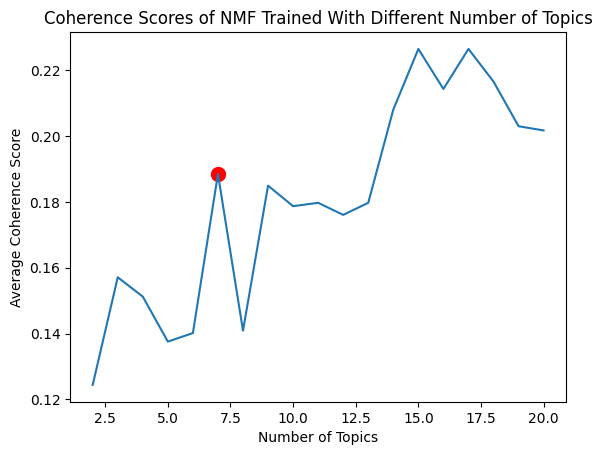

In [19]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2, 21), scores)
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.title('Coherence Scores of NMF Trained With Different Number of Topics')
plt.scatter(n_topics, scores[n_topics - 2], c='red', marker='o', s=100)